In [1]:
from sklearn.datasets import load_iris

In [15]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
iris = load_iris()

In [4]:
x = iris.data
y = iris.target

In [5]:
from sklearn.decomposition import PCA

### Step 1. 開PCA機

In [7]:
pca = PCA(n_components = 2)

### Step 2 訓練

In [8]:
pca.fit(x)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

### Step 3 預測

In [11]:
x[87]

array([6.3, 2.3, 4.4, 1.3])

In [12]:
X = pca.transform(x)

In [13]:
X[87]

array([ 0.81509524, -0.37203706])

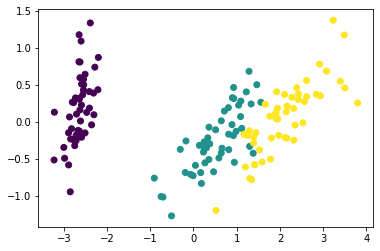

In [16]:
plt.scatter(X[:,0], X[:,1], c=y)

### 準備訓練/測試資料

In [20]:
from sklearn.model_selection import train_test_split

In [22]:
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 0)

In [23]:
from sklearn.svm import SVC

In [28]:
clf = SVC(gamma = "auto")

### Step 2: 訓練

In [29]:
clf.fit(x_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

### Step 3: 預測

In [30]:
y_predict = clf.predict(x_test)

In [31]:
y_predict

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0])

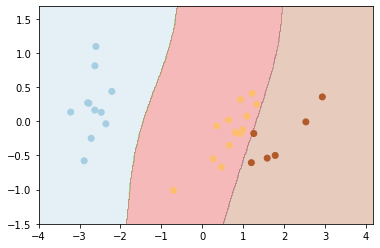

In [35]:
x0 = np.arange(-4, 4.2, 0.02)
y0 = np.arange(-1.5, 1.7, 0.02)

xm, ym = np.meshgrid(x0, y0)
P = np.c_[xm.ravel(), ym.ravel()]
z = clf.predict(P)
Z = z.reshape(xm.shape)
plt.contourf(xm, ym, Z, alpha = 0.3, cmap = "Paired")
plt.scatter(x_test[:,0], x_test[:,1], c = y_test, cmap = "Paired")

## K-Means 自動分類

In [36]:
x = np.random.rand(100,2)

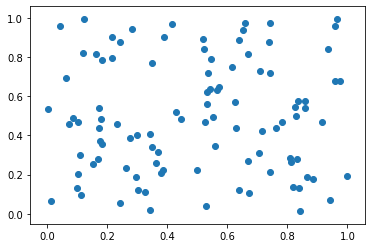

In [37]:
plt.scatter(x[:,0], x[:,1])

### Step 1. 打開 k-means 學習機

In [38]:
from sklearn.cluster import KMeans

In [39]:
clf = KMeans(n_clusters = 3)

### step2. 學習

In [40]:
clf.fit(x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

### step3. 預測

In [41]:
clf.predict(x)

array([2, 2, 2, 2, 1, 0, 1, 2, 1, 1, 1, 1, 0, 1, 0, 0, 2, 2, 1, 0, 0, 1,
       0, 2, 2, 0, 1, 0, 1, 2, 2, 2, 0, 2, 0, 0, 0, 2, 2, 0, 1, 2, 1, 0,
       2, 2, 0, 1, 2, 1, 2, 2, 2, 2, 0, 1, 1, 1, 1, 0, 0, 1, 2, 0, 0, 0,
       1, 1, 2, 1, 1, 2, 1, 2, 2, 2, 1, 0, 0, 2, 1, 1, 0, 2, 0, 2, 2, 2,
       1, 0, 2, 1, 0, 1, 0, 2, 1, 0, 1, 0], dtype=int32)

In [42]:
clf.labels_

array([2, 2, 2, 2, 1, 0, 1, 2, 1, 1, 1, 1, 0, 1, 0, 0, 2, 2, 1, 0, 0, 1,
       0, 2, 2, 0, 1, 0, 1, 2, 2, 2, 0, 2, 0, 0, 0, 2, 2, 0, 1, 2, 1, 0,
       2, 2, 0, 1, 2, 1, 2, 2, 2, 2, 0, 1, 1, 1, 1, 0, 0, 1, 2, 0, 0, 0,
       1, 1, 2, 1, 1, 2, 1, 2, 2, 2, 1, 0, 0, 2, 1, 1, 0, 2, 0, 2, 2, 2,
       1, 0, 2, 1, 0, 1, 0, 2, 1, 0, 1, 0], dtype=int32)

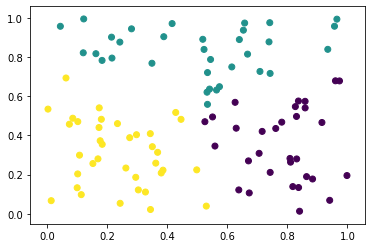

In [43]:
plt.scatter(x[:,0], x[:,1], c = clf.labels_)

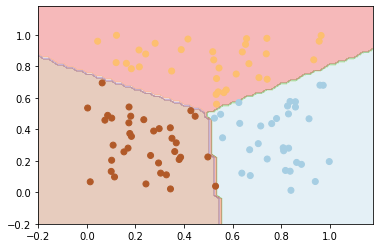

In [44]:
x0 = y0 = np.arange(-0.2, 1.2, 0.02)
xm, ym = np.meshgrid(x0,y0)

P = np.c_[xm.ravel(), ym.ravel()]
z = clf.predict(P)

Z = z.reshape(xm.shape)
plt.contourf(xm, ym, Z, alpha = 0.3, cmap="Paired")
plt.scatter(x[:,0], x[:,1], c=clf.labels_, cmap="Paired")

### make_blobs 生更像真實世界的數據

In [45]:
from sklearn.datasets.samples_generator import make_blobs

In [46]:
x, y = make_blobs(n_samples =500, centers=3,n_features=2, random_state=0)

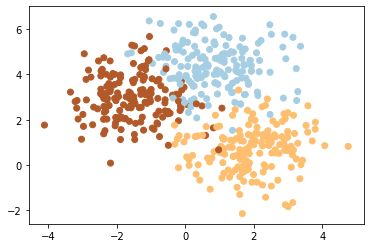

In [47]:
plt.scatter(x[:,0], x[:,1], c=y, cmap="Paired")

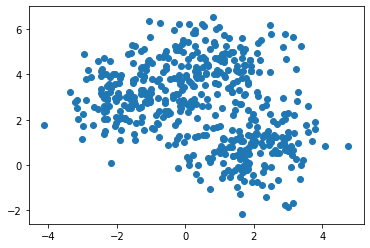

In [48]:
plt.scatter(x[:,0], x[:,1])

### step 1. 打開函數學習機

In [49]:
from sklearn.cluster import MeanShift

In [62]:
clf = MeanShift(bandwidth=0.2)

### step 2.訓練

In [63]:
clf.fit(x)

MeanShift(bandwidth=0.2, bin_seeding=False, cluster_all=True, min_bin_freq=1,
          n_jobs=None, seeds=None)

### step 3.結果

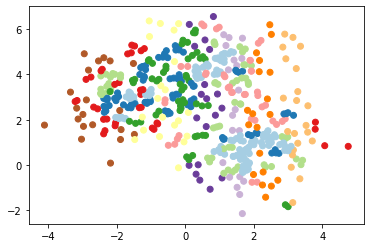

In [64]:
plt.scatter(x[:,0], x[:,1], c = clf.labels_, cmap = "Paired")

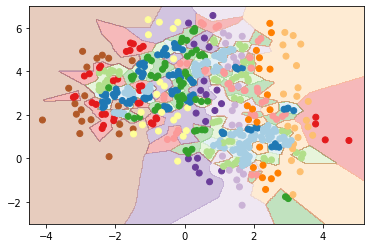

In [65]:
x0 = np.arange(-4.5, 5.2, 0.02)
y0 = np.arange(-3, 7, 0.02)

xm, ym = np.meshgrid(x0,y0)

P = np.c_[xm.ravel(), ym.ravel()]
z = clf.predict(P)
Z = z.reshape(xm.shape)

plt.contourf(xm, ym, Z,alpha = 0.3, cmap="Paired")
plt.scatter(x[:,0],x[:,1], c=clf.labels_, cmap="Paired")


### Cross_val_score

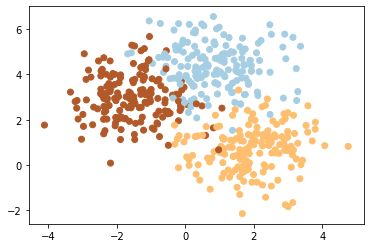

In [70]:
plt.scatter(x[:,0], x[:,1], c=y, cmap="Paired")

In [71]:
from sklearn.model_selection import cross_val_score

### SVC

In [74]:
from sklearn.svm import SVC

In [75]:
clf = SVC(gamma ="auto")

In [76]:
scores = cross_val_score(clf, x, y, cv=5)

In [77]:
scores

array([0.94117647, 0.94059406, 0.98989899, 0.90909091, 0.92929293])

In [78]:
scores.max()

0.98989898989899

In [79]:
scores.mean()

0.9420106716554008

### Decision Tress

In [80]:
from sklearn.tree import DecisionTreeClassifier

In [83]:
clf = DecisionTreeClassifier()

In [84]:
scores = cross_val_score(clf, x, y, cv =5)

In [85]:
scores

array([0.91176471, 0.9009901 , 0.94949495, 0.90909091, 0.87878788])

In [86]:
scores.max()

0.9494949494949495

In [89]:
scores.mean()

0.9100257084531982

### Random Forest

In [67]:
from sklearn.ensemble import RandomForestClassifier

In [68]:
clf = RandomForestClassifier(n_estimators=100)

In [90]:
score = cross_val_score(clf, x,y, cv=5)

In [91]:
score

array([0.92156863, 0.89108911, 0.94949495, 0.8989899 , 0.88888889])

In [92]:
score.max()

0.9494949494949495

In [93]:
score.mean()

0.9100062947471219